In [37]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
from FileManagement2 import df_to_csv

In [2]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6'
csv_path = os.path.join(out_path,'csv_file','pr_day_2030-2040','Project_PT_Revubue_2_Rev_2_01_moz_precipitation_2030-2040.csv')
precipitation_2030_2040 = pd.read_csv(csv_path,header=[0,1],index_col=[0,1,2,3,4])#*86400 # units kg.m^(-2).s^(-1)
# convert precipitation data from kg.m^(-2).s^(-1) to mm/day :  1 kg/m2/s = 86400 mm/day
# source: https://www.researchgate.net/post/How-do-I-convert-ERA-Interim-precipitation-estimates-from-kg-m2-s-to-mm-day

In [3]:
precipitation_2030_2040


Longitude
                                                                   33.625
Name project          Experiment Model      Date       Latitude          
PT_Revubue_2_Rev_2_01 ssp245     ACCESS-CM2 01-01-2030 -16.125   0.000218
                                            02-01-2030 -16.125   0.000104
                                            03-01-2030 -16.125   0.000121
                                            04-01-2030 -16.125   0.000217
                                            05-01-2030 -16.125   0.000131
...                                                                   ...
                      ssp370     TaiESM1    27-12-2040 -16.125   0.000015
                                            28-12-2040 -16.125   0.000094
                                            29-12-2040 -16.125   0.000123
                                            30-12-2040 -16.125   0.000181
                                            31-12-2040 -16.125   0.000042

[241080 rows x 1 columns]

In [4]:
# find non finite values

In [5]:
non_finite_index=np.where(~np.isfinite(precipitation_2030_2040))[0].tolist()
non_finite_index

[8825,
 10286,
 11747,
 12843,
 14304,
 15765,
 16861,
 18322,
 19783,
 20879,
 22340,
 23801,
 24108,
 25934,
 27760,
 49005,
 50466,
 51927,
 53023,
 54484,
 55945,
 57041,
 58502,
 59963,
 69095,
 70556,
 72017,
 73113,
 74574,
 76035,
 77131,
 78592,
 80053,
 81149,
 82610,
 84071,
 84378,
 86204,
 88030,
 109275,
 110736,
 112197,
 113293,
 114754,
 116215,
 117311,
 118772,
 120233,
 129365,
 130826,
 132287,
 133383,
 134844,
 136305,
 137401,
 138862,
 140323,
 141419,
 142880,
 144341,
 144648,
 146474,
 148300,
 169545,
 171006,
 172467,
 173563,
 175024,
 176485,
 177581,
 179042,
 180503,
 189635,
 191096,
 192557,
 193653,
 195114,
 196575,
 197671,
 199132,
 200593,
 201689,
 203150,
 204611,
 204918,
 206744,
 208570,
 225008,
 225009,
 225010,
 225011,
 225012,
 225013,
 225014,
 225015,
 225016,
 225017,
 225018,
 225019,
 225020,
 225021,
 225022,
 225023,
 225024,
 225025,
 225026,
 225027,
 225028,
 225029,
 225030,
 225031,
 225032,
 225033,
 225034,
 225035,
 2250

In [6]:
df_non_finite=precipitation_2030_2040.iloc[non_finite_index]
df_non_finite

Longitude
                                                                    33.625
Name project          Experiment Model       Date       Latitude          
PT_Revubue_2_Rev_2_01 ssp245     BCC-CSM2-MR 29-02-2032 -16.125        NaN
                                             29-02-2036 -16.125        NaN
                                             29-02-2040 -16.125        NaN
                                 CanESM5     29-02-2032 -16.125        NaN
                                             29-02-2036 -16.125        NaN
...                                                                    ...
                      ssp370     NorESM2-MM  29-02-2036 -16.125        NaN
                                             29-02-2040 -16.125        NaN
                                 TaiESM1     29-02-2032 -16.125        NaN
                                             29-02-2036 -16.125        NaN
                                             29-02-2040 -16.125        NaN

[4114 rows x 1 columns]

In [7]:
models_to_delete = []
for i in (np.arange(0,len(df_non_finite.index.tolist())-1)):
    if df_non_finite.index.tolist()[i][2] not in models_to_delete:
        models_to_delete.append(df_non_finite.index.tolist()[i][2])

In [8]:
models_to_delete

['BCC-CSM2-MR',
 'CanESM5',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'IITM-ESM',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'NESM3']

In [9]:
precipitation_2030_2040.shape

(241080, 1)

In [10]:
precipitation_2030_2040_no_NaN = precipitation_2030_2040.drop(models_to_delete,level=2)

In [11]:
precipitation_2030_2040_no_NaN.shape

(96432, 1)

In [12]:
precipitation_2030_2040_no_NaN.index.levels[2].tolist()

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CanESM5',
 'IITM-ESM',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1']

In [13]:
new_index_models=[]
for item in precipitation_2030_2040.index.levels[2].tolist():
    if item in models_to_delete:
        continue
    else:
        new_index_models.append(item)

In [14]:
type(new_index_models)

list

In [15]:
new_index_models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0']

In [105]:
time_2030_2040=pd.date_range('01-01-2030','31-12-2040', freq='D').strftime('%d-%m-%Y').values.tolist()
list_time_2030_2040= [item[6:10] for item in time_2030_2040]
list_time_2030_2040

['2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 '2030',
 

In [91]:
df = pd.DataFrame()
midx = pd.MultiIndex.from_product([[precipitation_2030_2040_no_NaN.index.levels[0].tolist()[0],],precipitation_2030_2040_no_NaN.index.levels[1].tolist(), new_index_models, list_time_2030_2040],names=['Name project','Experiment', 'Model', 'Month and year'])
cols = pd.MultiIndex.from_product([('Precipitation mm/day',)])
Variable_dataframe = pd.DataFrame(data = precipitation_2030_2040_no_NaN.values*86400, 
                            index = midx,
                            columns = cols)
df = pd.concat([df,Variable_dataframe])
#df['year']=df.reset_index()['Month and year'].apply(lambda k: int(k.split('-')[1]))

AttributeError: 'Series' object has no attribute 'split'

In [116]:
df1 = pd.DataFrame()
midx = pd.MultiIndex.from_product([[precipitation_2030_2040_no_NaN.index.levels[0].tolist()[0],],precipitation_2030_2040_no_NaN.index.levels[1].tolist(), new_index_models, list_time_2030_2040],names=['Name project','Experiment', 'Model', 'Year'])
cols = pd.MultiIndex.from_product([('Precipitation mm/day',)])
Variable_dataframe = pd.DataFrame(data = precipitation_2030_2040_no_NaN.values*86400, 
                            index = midx,
                            columns = cols)
df1 = pd.concat([df1,Variable_dataframe])
#df['year']=df.reset_index()['Month and year'].apply(lambda k: int(k.split('-')[1]))

In [118]:
DF=df1.groupby(['Name project','Experiment', 'Model', 'Year']).max()

In [103]:
a=df.reset_index()
a['year']=a['Month and year'].apply(lambda k: int(k.split('-')[1]))

AttributeError: 'Series' object has no attribute 'split'

In [114]:
df_max_2030_2040=df1.groupby(['Name project','Experiment', 'Model', 'Year']).max() # .sum() to count the number of true and false

In [115]:
df_max_month_2030_2040

Precipitation mm/day
Name project          Experiment Model      Month and year                     
PT_Revubue_2_Rev_2_01 ssp126     ACCESS-CM2 01-2030                   28.500094
                                            01-2031                   26.094935
                                            01-2032                   22.877599
                                            01-2033                   17.736608
                                            01-2034                   22.220564
...                                                                         ...
                      ssp585     MRI-ESM2-0 12-2036                   35.560444
                                            12-2037                   13.130333
                                            12-2038                   13.935345
                                            12-2039                   12.010463
                                            12-2040                   19.539956

[3168 rows x 1 columns]

In [21]:
df_max_month_2030_2040_ssp126_ACCESS_CM2 = df_max_month_2030_2040.loc[('PT_Revubue_2_Rev_2_01','ssp126','ACCESS-CM2')]

In [22]:
df_max_month_2030_2040_ssp126_ACCESS_CM2

,Precipitation mm/day
Month and year,
01-2030,28.500094
01-2031,26.094935
01-2032,22.877599
01-2033,17.736608
01-2034,22.220564
...,...
12-2036,19.006146
12-2037,17.778331
12-2038,22.223846


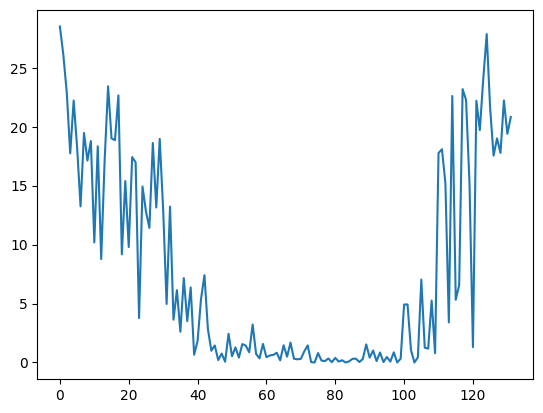

In [23]:
plt.plot(df_max_month_2030_2040_ssp126_ACCESS_CM2.values)

In [77]:
Z = df_max_month_2030_2040_ssp126_ACCESS_CM2.values.reshape(132)/len(df_max_month_2030_2040_ssp126_ACCESS_CM2.values.reshape(132))
Z1 = df_max_month_2030_2040_ssp126_ACCESS_CM2.values.reshape(132).tolist()
Z = Z.tolist()
Z.sort()
Z1.sort()

In [69]:
print(Z)

[0.0, 0.0, 0.0, 0.0, 0.00018342904736941406, 0.00021669135838403073, 0.0002701771315762678, 0.0003066574973590005, 0.0005202048421117731, 0.0005741141938580603, 0.0005904301071330502, 0.0006873470903718209, 0.0008943232470218472, 0.0009069888206299352, 0.0012223749680825592, 0.0013722130957334725, 0.0014343582403274593, 0.0015369293991666796, 0.00202290104260266, 0.0022374892234273084, 0.002337114363564813, 0.0023424054399418474, 0.0024184134665781384, 0.0024456302443550985, 0.0024554664791635746, 0.0025700352787019006, 0.0026444583041170104, 0.0029456570535496053, 0.0031224515127674254, 0.0031392956853696064, 0.0032708632881456815, 0.00343920321690596, 0.0035032694127452983, 0.0037327591350979424, 0.004033483128296211, 0.004517783897674896, 0.004864925358560868, 0.004986181077335707, 0.005476657547247173, 0.005733496800530702, 0.005932223509510302, 0.00604184546814808, 0.006258148575646126, 0.006421076580987905, 0.006515959963011978, 0.006566319842187857, 0.007142341134815731, 0.00755

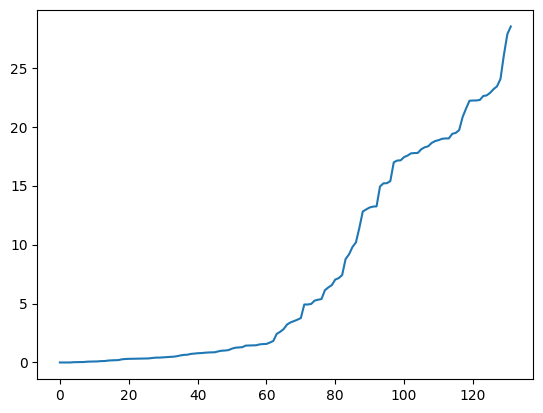

In [27]:
plt.plot(np.arange(0,len(np.sort(Z))),Z)

In [146]:
Z=DF.loc[('PT_Revubue_2_Rev_2_01','ssp126','ACCESS-CM2'),'Precipitation mm/day'].values

In [147]:
Z.reshape((11,)).sort()

In [148]:
Z

array([[18.85845358],
       [19.39554205],
       [20.81981641],
       [22.26793142],
       [22.60357384],
       [22.65516529],
       [23.18675062],
       [24.04635921],
       [26.0949349 ],
       [27.85320841],
       [28.50009436]])

In [149]:
(loc,scale)=stats.gumbel_r.fit(Z) # renvoie les deux parametres necessaire pour etablir la fonction continue
loc

21.849428698529312

In [150]:
scale

2.571373901657531

In [151]:
x = 100
gumbel_r.pdf(x,loc,scale)

2.4576754270236788e-14

In [152]:
p = 0.995 # percentile of non-exceedance
print('For a return period '+str(round((1/(1-p))))+' years')
gumbel_r.ppf(p,loc,scale) # Percent point function

For a return period 200 years


35.466941829924934

In [153]:
p = 0.99 # percentile of non-exceedance
print('For a return period '+str(round((1/(1-p))))+' years')
gumbel_r.ppf(p,loc,scale) # Percent point function

For a return period 100 years


33.67813236399268

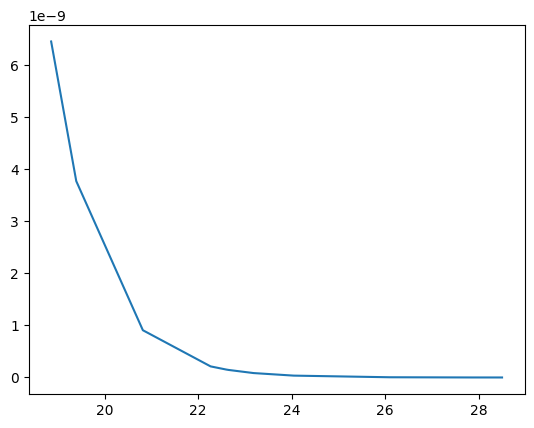

In [154]:
fig, ax = plt.subplots(1, 1)
ax.plot(Z,gumbel_r.pdf(Z))

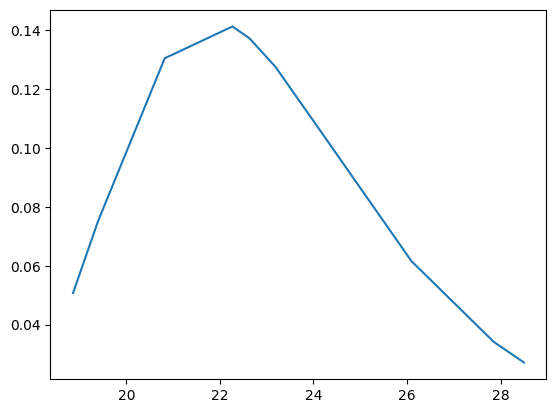

In [156]:
fig, ax = plt.subplots(1, 1)
ax.plot(Z,gumbel_r.pdf((Z-loc)/scale) / scale)

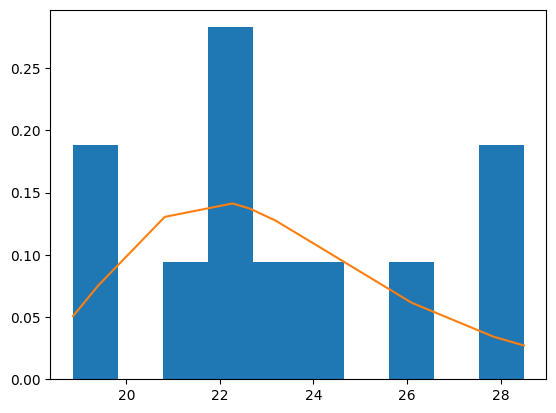

In [160]:
# xaxis is precipitation and yaxis is densiy of probability
myHist = plt.hist(Z,density=True)
h = plt.plot(Z,gumbel_r.pdf(Z,loc,scale))
plt.show()

In [ ]:
# need to find which law to apply when